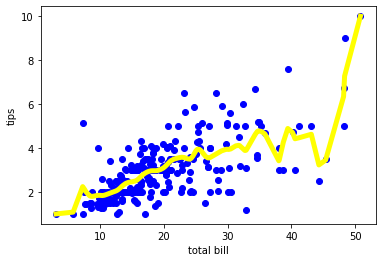

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kernel(point , xmat , k):
    m , n = np.shape(xmat)
    weights = np.mat(np.eye(m))

    for j in range(m):
        diff = point - x[j]
        # weights[j , j] = np.exp(diff * diff.T/(-2.0 , k**2))
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))

    return weights

def localweights(point , xmat , ymat , k):
    wt = kernel(point , xmat , k)
    w = (x.T * (wt*x)).I * (x.T * wt * ymat.T)
    return w

def localweightregression(xmat , ymat , k):
    m , n = np.shape(xmat)
    ypred = np.zeros(m)

    for i in range(m):
        ypred[i] = xmat[i] * localweights(xmat[i] , xmat , ymat , k )

    return ypred

data  = pd.read_csv('../tips.csv')
colA = np.array(data.total_bill)
colB = np.array(data.tip)

mcolA = np.mat(colA)
mcolB = np.mat(colB)
m = np.shape(mcolB)[1]
one = np.ones((1,m) , dtype = int)

x = np.hstack((one.T , mcolA.T))

ypred = localweightregression(x, mcolB , 0.8)

xsort = x.copy()
xsort.sort(axis=0)
plt.scatter(colA , colB , color='blue')
plt.plot(xsort[:,1] ,  ypred[x[: , 1].argsort(0)] , linewidth=5 , color='yellow')
plt.xlabel('total bill')
plt.ylabel('tips')
plt.show()